## Homework 03
### Van der Pol Oscillator
In dynamics, the Van der Pol oscillator is a non-conservative oscillator with non-linear damping. It evolves in time according to the second-order differential equation:
$$\frac{d^2x}{dt^2}-\mu(1-x^2)\frac{dx}{dt}+x=0$$

#### Instructions:
1. Solve the diferential equation using Maple and store the data as csv.
2. Keeping the initial conditions, draw the limit cycle varying $\mu$ between (0,4) by 0.5 steps.
3. Create a phase portrait using Python using $\mu = const$ and variating the initial conditions.

##### Solution

Let's asume $x_0 = x$ y $x_1 = \frac{dx}{dt}$. Then:
$$x_0=x$$ 
$$\frac{dx_0}{dt}=\frac{dx}{dt}$$
$$\frac{dx_0}{dt}=x_1$$ 
Then:
$$x_1 = \frac{dx}{dt}$$
$$\frac{dx_1}{dt}=\frac{d^2x}{dt^2}$$
From the original equation $\frac{d^2x}{dt^2}-\mu(1-x^2)\frac{dx}{dt}+x=0$ solve for $\frac{d^2x}{dt^2}$
$$\frac{d^2x}{dt^2}=\mu(1-x^2)\frac{dx}{dt}-x$$
$$\frac{dx_1}{dt}=\mu(1-x^2)\frac{dx}{dt}-x$$
Replace $\frac{dx}{dt}$ and $x$ by $x_1$ and $x_0$ respectively:
$$\frac{dx_1}{dt}=\mu(1-x^2)x_1-x_0$$

Finally we got the following system of differential equations:
$$\frac{dx}{dt}x_0(t)=x_1$$ $$\frac{dx}{dt}x_1(t) = \mu(1-x_0(t)^2)x_1(t)-x_0(t)$$ 

We insert the system of differential equations in to Maple and solve, for the first test, let's use the following inicial conditions $x_0(0) = 1$, $x_1(0) = 1$ and $\mu=0.5$

After that the data is export as csv and load with python.

In [102]:
import numpy as np
import pylab as pl
import os

data = np.genfromtxt('data/test.csv')
print np.shape(data)

(1001, 3)


Let's plot the imported test data.

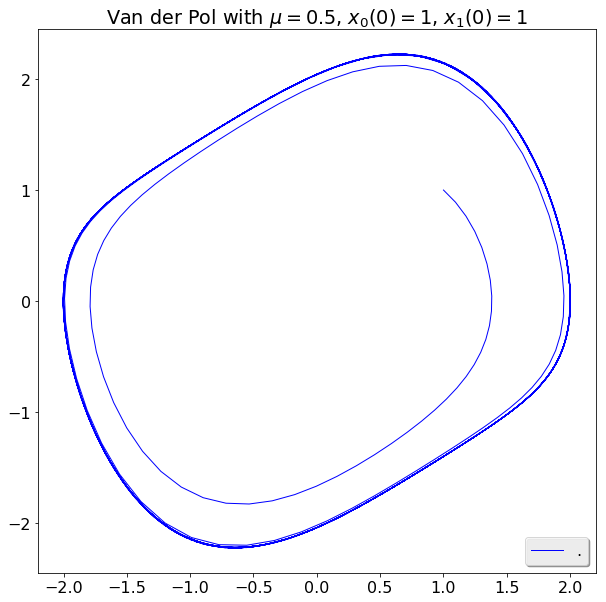

In [17]:
pl.rc('font',size=16)
pl.figure(figsize=(10,10))
pl.plot(data[:,1],data[:,2],'b', linewidth=1.0, label='$.$')
pl.title('Van der Pol with $\mu = 0.5$, $x_0(0) = 1$, $x_1(0) = 1$')
pl.legend(loc=4,fancybox=True, shadow=True)
pl.show()

Implementation of a function that draws the limit cycle.

In [135]:
def limit_cycle(mu,x0,x1):
    pl.rc('font',size=16)
    pl.figure(figsize=(15,15))
    pl.title('Van der Pol limit cycle varying $\mu$ between 0 y '+str(mu)+', $x_0(0) = '+str(x0)+'$, $x_1(0) = '+str(x1)+'$')
    pl.legend(loc=4,fancybox=True, shadow=True)
    pl.xlim([-6.5,6.5])
    pl.ylim([-6.5,6.5])
    c = np.linspace(0.0, 1.0, num=mu*2+1)
    j=0
    for i in [x / 2.0 for x in range(mu*2+1)]:
        data = np.genfromtxt('data/mu='+str(i)+',x0='+str(x0)+',x1='+str(x1)+'.csv')
        pl.plot(data[:,1],data[:,2],c=plt.cm.jet(c[j]), linewidth=0.7, label='$\mu$' )
        j=j+1
    pl.show()

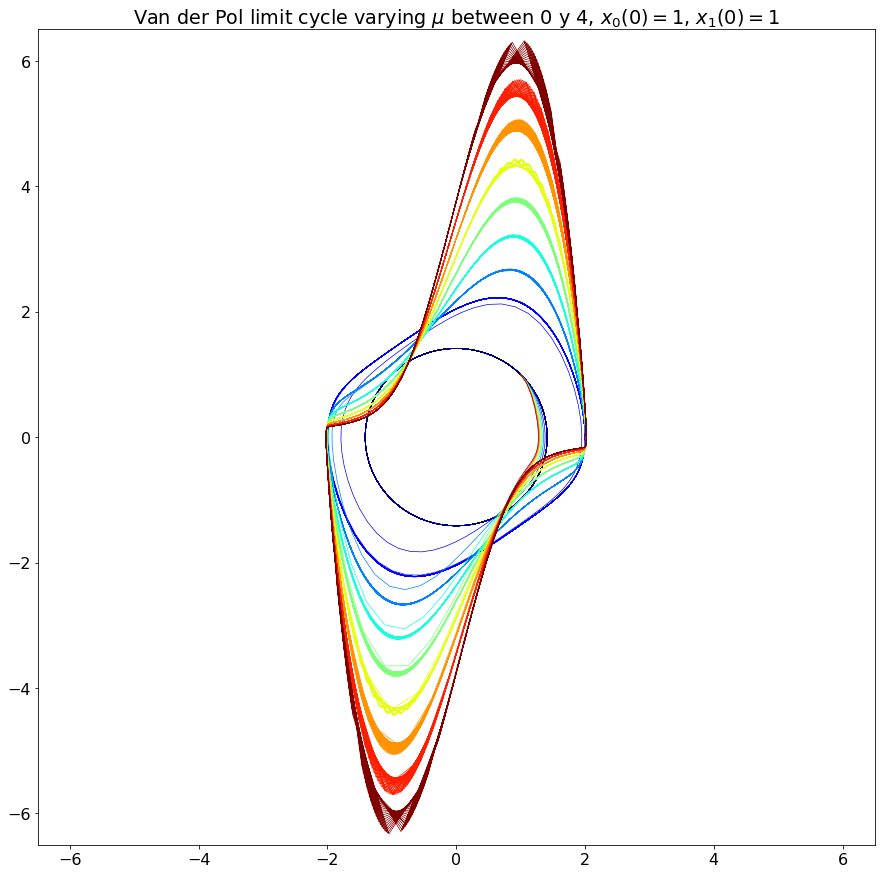

In [132]:
limit_cycle(4,1,1)

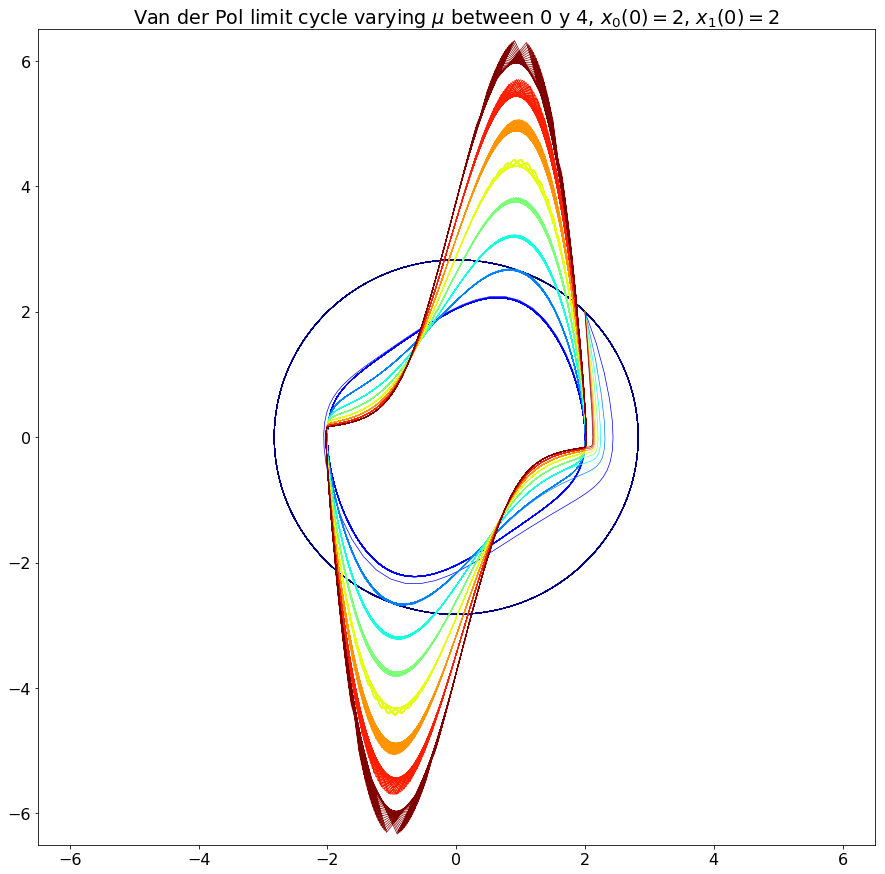

In [133]:
limit_cycle(4,2,2)

In order create a phase portrait I'm going to use the animation module of matplotlib http://matplotlib.org/api/animation_api.html.

Before than anything, let's import a set of libraries that will be useful for the visualization.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML 
import time, os

The animation API says that someone who wants to create an animation should first create a set of functions that will define the behaviour of the animation. First let's implement the init function that loads the dataset.

In [136]:
def init():
    global points, line
    points  = []
    line    = []
    c = np.linspace(0.0, 1.0, num=len(os.listdir(os.getcwd()+'/data2/')))
    i=0
    for f in os.listdir(os.getcwd()+'/data2/'):
        points.append(np.genfromtxt('data2/'+f))
        #line.append(ax.plot([], [], label = 'trayectory', c=plt.cm.gist_rainbow(c[i]), lw = 1)[0]) #plot a continous line
        line.append(ax.plot([], [], ".", label = 'trayectory', c=plt.cm.gist_rainbow(c[i]))[0])     #plot dots
        i=i+1

After that it's necessary to define the function that shows each frame step by step.

In [137]:
def animate(f):
    for idx, l in enumerate(points):
        line[idx].set_data(l[:f, 1], l[:f, 2])
    return

Set parameters for the ploting

In [138]:
np.set_printoptions(threshold=np.inf)
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111, frameon = True)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.legend()
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames = 300, interval=100)
HTML(anim.to_html5_video())